# Assignment

1. Gunakan kombinasi berikut untuk dataset wave:
  - Feature extractor HOG dengan image size 128 dan 300
  - Feature extractor LBP dengan image size 128 dan 300

  Masing-masing kombinasi dilakukan training dengan 3 algoritma:
    - LinearSVC
    - Logistic Regression
    - Random Forest
  Gunakan random_state=10 apabila dibutuhkan!

  Lakukan eksperimen terhadap hyperparameter sesuai kebutuhan dan tentukan komposisi mana yang dapat menghasilkan accuracy dan F1 score tertinggi! Berikan kesimpulan dan jelaskan!

2. Lanjutkan untuk dataset wave:
  - Ambilah secarik kertas dan buatlah 30 data tambahan untuk training dengan komposisi:
    - 15 healthy (dengan gambar wave yang rapih)
    - 15 parkinson (dengan gambar wave yang lebih ireguler)
  - Lakukan training dengan komposisi feature extractor, ukuran gambar, algoritma, serta hyperparameter terbaik yang didapat untuk nomor 1!

  Jelaskan, apakah terdapat perbedaan dalam hasil evaluasi training setelah ditambahkan data baru?

In [1]:
from skimage import feature
from imutils import paths
import numpy as np
import cv2 as cv
import os
import pandas as pd
from google.colab.patches import cv2_imshow

# Metode Processing

In [2]:
def preprocess(image, image_size=128):
		image = cv.cvtColor(image, cv.COLOR_BGR2GRAY) # Ubah mehjadi grayscale
		image = cv.resize(image, (image_size, image_size)) # Resize gambar menjadi suatu ukuran (default = 128)
		image = cv.threshold(image, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)[1] # Melakukan thresholding dan mengambil hasil gambar thresholding
		return image

# Feature Extraction

HOG

In [3]:
def quantify_image_hog(image): # Histogram of Oriented Gradient features
	features = feature.hog(image, orientations=9, pixels_per_cell=(10, 10), cells_per_block=(2, 2), transform_sqrt=True, block_norm="L1")
	return features

LBP

In [4]:
def quantify_image_lbp(image): # Local Binary Pattern features
  features = feature.local_binary_pattern(image, 24, 8, method="uniform")
  (hist, _) = np.histogram(features.flatten(), bins=np.arange(0, 27), range=(0, 26))
  hist = hist.astype("float")
  hist /= (hist.sum() + 1e-7)
  return hist

### Testing Preprocess

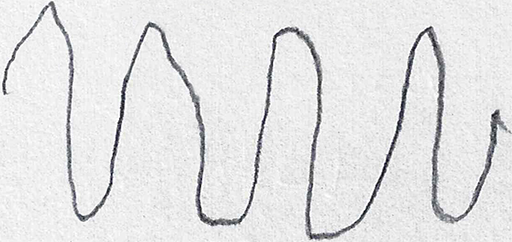

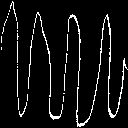

HOG
[0.0423478  0.         0.         ... 0.11173493 0.         0.        ] 4356
LBP
[2.23999023e-02 2.47192383e-02 1.09863281e-03 6.10351562e-05
 6.10351562e-05 1.22070312e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 9.36889648e-01 1.46484375e-02] 26


In [5]:
image_test = cv.imread('drive/My Drive/Bootcamp ML2020/untuk_assignment13/wave/testing/healthy/V01HO01.png')
image_test_preprocessed = preprocess(image_test, image_size=128)
cv2_imshow(image_test)
cv2_imshow(image_test_preprocessed)
features_hog = quantify_image_hog(image_test_preprocessed)
features_lbp = quantify_image_lbp(image_test_preprocessed)
print("HOG")
print(features_hog, len(features_hog))
print("LBP")
print(features_lbp, len(features_lbp))

### Split Dataset

In [6]:
def load_split(path, image_size=200, extraction_method='hog'):
	image_paths = list(paths.list_images(path))
	data = []
	labels = []

	for image_path in image_paths:
		label = image_path.split(os.path.sep)[-2]

		image = cv.imread(image_path)
		image = preprocess(image, image_size=image_size)
		
		if extraction_method == 'hog':
			features = quantify_image_hog(image)
		elif extraction_method == 'lbp':
			features = quantify_image_lbp(image)

		data.append(features)
		labels.append(label)

	return (np.array(data), np.array(labels))

### Load Dataset

In [7]:
dataset_dir = '/content/drive/My Drive/Bootcamp ML2020/untuk_assignment13/wave'
trainingPath = os.path.join(dataset_dir, "training")
testingPath = os.path.join(dataset_dir, "testing")

### Set ukuran yang akan di resize dan metode feature extraction

In [11]:
resize_image_size = 128 # Masing-masing gambar perlu diresize menjadi suatu ukuran yang tetap
extraction_method = 'hog' # 'lbp' atau 'hog'

### Split Data Set

In [12]:
(feature_train, label_train) = load_split(trainingPath, image_size=resize_image_size, extraction_method=extraction_method)
(feature_test, label_test) = load_split(testingPath, image_size=resize_image_size, extraction_method=extraction_method)
print("Data loaded!")

Data loaded!


### Encode label (0 = healthy, 1 = parkinsons)

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
label_train = le.fit_transform(label_train)
label_test = le.transform(label_test)

In [14]:
label_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [15]:
label_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [16]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score

### Logistic Regression

In [17]:
# from sklearn.linear_model import LogisticRegression

# logreg = LogisticRegression()
# logreg.fit(feature_train, label_train)
# predictions = logreg.predict(feature_test)

# classification_report(label_test, predictions)
# print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(feature_test, label_test))) # .score() -> Accuracy
# print("F1", f1_score(label_test, predictions, average="macro"))
# print("Precision", precision_score(label_test, predictions, average="macro"))
# print("Recall", recall_score(label_test, predictions, average="macro"))

### SVM

In [18]:
# from sklearn.svm import SVC
# classifier_rbf = SVC(kernel = "rbf")
# classifier_rbf.fit(feature_train, label_train)
# predictions = classifier_rbf.predict(feature_test)

# classification_report(label_test, predictions)
# print('Accuracy of SVM on test set: {:.2f}'.format(classifier_rbf.score(feature_test, label_test)))
# print("F1", f1_score(label_test, predictions, average="macro"))
# print("Precision", precision_score(label_test, predictions, average="macro"))
# print("Recall", recall_score(label_test, predictions, average="macro"))

### Random Forest

In [19]:
# from sklearn.ensemble import RandomForestClassifier

# model = RandomForestClassifier(n_estimators=100, random_state=10)
# model.fit(feature_train, label_train)

# predictions = model.predict(feature_test)

# classification_report(label_test, predictions)

# print(pd.crosstab(label_test, predictions, rownames=['True'], colnames=['Predicted'], margins=True))

In [20]:
# from sklearn.metrics import classification_report
# from sklearn.metrics import f1_score, precision_score, recall_score

# print(classification_report(label_test, predictions))

# print('Accuracy of Random Forest on test set: {:.2f}'.format(model.score(feature_test, label_test)))
# print("F1", f1_score(label_test, predictions, average="macro"))
# print("Precision", precision_score(label_test, predictions, average="macro"))
# print("Recall", recall_score(label_test, predictions, average="macro"))

In [21]:
# testing_paths = list(paths.list_images(testingPath))
# images = []

# for testing_path in testing_paths[:25]:
# 	image = cv.imread(testing_path)
# 	output = image.copy()
# 	output = cv.resize(output, (128, 128))

# 	image = preprocess(image, image_size=resize_image_size)

# 	if extraction_method == 'hog':
# 		features = quantify_image_hog(image)
# 	elif extraction_method == 'lbp':
# 		features = quantify_image_lbp(image)
   
# 	preds = model.predict([features])
# 	label = le.inverse_transform(preds)[0]

# 	color = (0, 255, 0) if label == "healthy" else (0, 0, 255)
# 	cv.putText(output, label, (3, 20), cv.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
# 	images.append(output)

In [22]:
# from imutils import build_montages

# montage = build_montages(images, (128, 128), (5, 5))[0]

# cv2_imshow(montage)

# Soal Nomor 1

1. Gunakan kombinasi berikut untuk dataset wave:
  - Feature extractor HOG dengan image size 128 dan 300
  - Feature extractor LBP dengan image size 128 dan 300

  Masing-masing kombinasi dilakukan training dengan 3 algoritma:
    - LinearSVC
    - Logistic Regression
    - Random Forest
  Gunakan random_state=10 apabila dibutuhkan!

  Lakukan eksperimen terhadap hyperparameter sesuai kebutuhan dan tentukan komposisi mana yang dapat menghasilkan accuracy dan F1 score tertinggi! Berikan kesimpulan dan jelaskan!

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [24]:
def training(resize_image_size, extraction_method):
  (feature_train, label_train) = load_split(trainingPath, image_size=resize_image_size, extraction_method=extraction_method)
  (feature_test, label_test) = load_split(testingPath, image_size=resize_image_size, extraction_method=extraction_method)
  # print("Data loaded!")

  le = LabelEncoder()
  label_train = le.fit_transform(label_train)
  label_test = le.transform(label_test)

  #LOGISTIC REGRESSION
  logreg = LogisticRegression()
  logreg.fit(feature_train, label_train)
  predictions = logreg.predict(feature_test)
  classification_report(label_test, predictions)
  print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(feature_test, label_test))) # .score() -> Accuracy
  print("F1", f1_score(label_test, predictions, average="macro"))
  print("Precision", precision_score(label_test, predictions, average="macro"))
  print("Recall", recall_score(label_test, predictions, average="macro"))

  #SVM kernel rbf
  def sv_krl(kertype,kername):
    classifier_rbf = SVC(kernel = kertype)
    classifier_rbf.fit(feature_train, label_train)
    predictions = classifier_rbf.predict(feature_test)
    classification_report(label_test, predictions)
    print('Accuracy of SVM',kername,'on test set: {:.2f}'.format(classifier_rbf.score(feature_test, label_test)))
    print("F1", f1_score(label_test, predictions, average="macro"))
    print("Precision", precision_score(label_test, predictions, average="macro"))
    print("Recall", recall_score(label_test, predictions, average="macro"))
  krn=['linear','rbf','poly']
  nama=['linear','rbf','poly']
  for i in range(len(krn)):
    sv_krl(krn[i],nama[i])


  #RANDOM FOREST
  def rnd_est(nestimator):
    model = RandomForestClassifier(n_estimators=nestimator, random_state=10)
    model.fit(feature_train, label_train)
    predictions = model.predict(feature_test)
    classification_report(label_test, predictions)
    print('Accuracy of Random Forest estimator',nestimator,'on test set: {:.2f}'.format(model.score(feature_test, label_test)))
    print("F1", f1_score(label_test, predictions, average="macro"))
    print("Precision", precision_score(label_test, predictions, average="macro"))
    print("Recall", recall_score(label_test, predictions, average="macro"))
  estimator=[50,100,200]
  for i in range(len(estimator)):
    rnd_est(estimator[i])



In [25]:
training(128, 'hog')

Accuracy of logistic regression classifier on test set: 0.67
F1 0.6651785714285714
Precision 0.6696832579185521
Recall 0.6666666666666666
Accuracy of SVM linear on test set: 0.67
F1 0.6666666666666666
Precision 0.6666666666666666
Recall 0.6666666666666666
Accuracy of SVM rbf on test set: 0.73
F1 0.7333333333333333
Precision 0.7333333333333333
Recall 0.7333333333333333
Accuracy of SVM poly on test set: 0.73
F1 0.7222222222222223
Precision 0.7777777777777777
Recall 0.7333333333333334
Accuracy of Random Forest estimator 50 on test set: 0.77
F1 0.7664071190211346
Precision 0.7678571428571428
Recall 0.7666666666666666
Accuracy of Random Forest estimator 100 on test set: 0.70
F1 0.6914285714285715
Precision 0.7250000000000001
Recall 0.7
Accuracy of Random Forest estimator 200 on test set: 0.73
F1 0.7285067873303168
Precision 0.7511961722488039
Recall 0.7333333333333334


In [26]:
training(300, 'hog')

Accuracy of logistic regression classifier on test set: 0.70
F1 0.6996662958843158
Precision 0.7008928571428572
Recall 0.7
Accuracy of SVM linear on test set: 0.73
F1 0.7321428571428572
Precision 0.7375565610859729
Recall 0.7333333333333334
Accuracy of SVM rbf on test set: 0.70
F1 0.6996662958843158
Precision 0.7008928571428572
Recall 0.7
Accuracy of SVM poly on test set: 0.67
F1 0.6411483253588517
Precision 0.7329192546583851
Recall 0.6666666666666667
Accuracy of Random Forest estimator 50 on test set: 0.60
F1 0.5927601809954751
Precision 0.6076555023923444
Recall 0.6
Accuracy of Random Forest estimator 100 on test set: 0.63
F1 0.6329254727474972
Precision 0.6339285714285714
Recall 0.6333333333333333
Accuracy of Random Forest estimator 200 on test set: 0.73
F1 0.7333333333333333
Precision 0.7333333333333333
Recall 0.7333333333333333


In [27]:
training(128, 'lbp')

Accuracy of logistic regression classifier on test set: 0.50
F1 0.4994438264738599
Precision 0.5
Recall 0.5
Accuracy of SVM linear on test set: 0.60
F1 0.569377990430622
Precision 0.639751552795031
Recall 0.6
Accuracy of SVM rbf on test set: 0.60
F1 0.569377990430622
Precision 0.639751552795031
Recall 0.6
Accuracy of SVM poly on test set: 0.63
F1 0.6122209165687428
Precision 0.6704545454545454
Recall 0.6333333333333333
Accuracy of Random Forest estimator 50 on test set: 0.57
F1 0.5661846496106784
Precision 0.5669642857142857
Recall 0.5666666666666667
Accuracy of Random Forest estimator 100 on test set: 0.57
F1 0.5661846496106784
Precision 0.5669642857142857
Recall 0.5666666666666667
Accuracy of Random Forest estimator 200 on test set: 0.57
F1 0.5661846496106784
Precision 0.5669642857142857
Recall 0.5666666666666667


In [28]:
training(300, 'lbp')

Accuracy of logistic regression classifier on test set: 0.53
F1 0.5333333333333333
Precision 0.5333333333333333
Recall 0.5333333333333333
Accuracy of SVM linear on test set: 0.57
F1 0.5542857142857143
Precision 0.575
Recall 0.5666666666666667
Accuracy of SVM rbf on test set: 0.57
F1 0.5542857142857143
Precision 0.575
Recall 0.5666666666666667
Accuracy of SVM poly on test set: 0.57
F1 0.5542857142857143
Precision 0.575
Recall 0.5666666666666667
Accuracy of Random Forest estimator 50 on test set: 0.70
F1 0.6996662958843158
Precision 0.7008928571428572
Recall 0.7
Accuracy of Random Forest estimator 100 on test set: 0.70
F1 0.6996662958843158
Precision 0.7008928571428572
Recall 0.7
Accuracy of Random Forest estimator 200 on test set: 0.67
F1 0.6651785714285714
Precision 0.6696832579185521
Recall 0.6666666666666666


In [35]:
testing_paths = list(paths.list_images(testingPath))
images = []
random_forest=RandomForestClassifier(n_estimators=50, random_state=10)
random_forest.fit(feature_train, label_train)

for testing_path in testing_paths[:25]:
	image = cv.imread(testing_path)
	output = image.copy()
	output = cv.resize(output, (128, 128))

	image = preprocess(image, image_size=128)

	if extraction_method == 'hog':
		features = quantify_image_hog(image)
	elif extraction_method == 'lbp':
		features = quantify_image_lbp(image)
   
	preds = random_forest.predict([features])
	label = le.inverse_transform(preds)[0]

	color = (0, 255, 0) if label == "healthy" else (0, 0, 255)
	cv.putText(output, label, (3, 20), cv.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
	images.append(output)

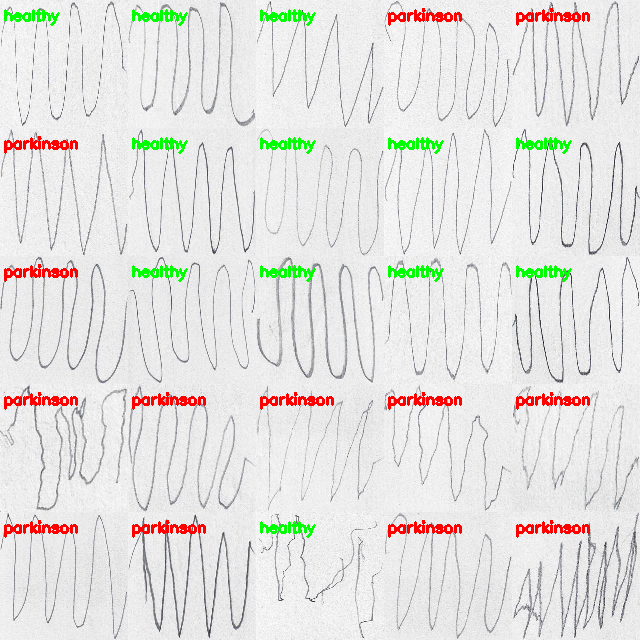

In [36]:
from imutils import build_montages

montage = build_montages(images, (128, 128), (5, 5))[0]

cv2_imshow(montage)

**Kesimpulan:** Dalam kasus ini, saya mendapatkan nilai akurasi tertinggi pada Metode **HOG** dengan ukuran gambar **128**, menggunakan algoritma **Random Forest Classifier** dengan **estimator 50** sebesar **77%**, karena tingkat akurasi yang didapat tidak terlalu tinggi, maka masih dapat kita temukan data yg kurang baik, seperti pada gambar diatas untuk gambar ke 3 bari paling bawah dikatakan bahwa data tersebut dibaca healthy, meskipun data itu harusnya parkinson, namun untuk gambar lainnya bisa dikatakan bagus


# Soal Nomor 2

2. Lanjutkan untuk dataset wave:
  - Ambilah secarik kertas dan buatlah 30 data tambahan untuk training dengan komposisi:
    - 15 healthy (dengan gambar wave yang rapih)
    - 15 parkinson (dengan gambar wave yang lebih ireguler)
  - Lakukan training dengan komposisi feature extractor, ukuran gambar, algoritma, serta hyperparameter terbaik yang didapat untuk nomor 1!

  Jelaskan, apakah terdapat perbedaan dalam hasil evaluasi training setelah ditambahkan data baru?

Disini saya akan melakukan **Feature Extraction** menggunakan algoritma **Random Forest Classifier** dengan nilai **estimator = 50** menggunakan metode **HOG** dan ukuran gambar **128**

In [46]:
dataset_dir = '/content/drive/My Drive/Bootcamp ML2020/untuk_assignment13/wave'

trainingPath = os.path.join(dataset_dir, "training")
testingPath = os.path.join(dataset_dir, "testing")

In [ ]:
# def training(resize_image_size, extraction_method):
#   (feature_train, label_train) = load_split(trainingPath, image_size=resize_image_size, extraction_method=extraction_method)
#   (feature_test, label_test) = load_split(testingPath, image_size=resize_image_size, extraction_method=extraction_method)
#   # print("Data loaded!")

#   le = LabelEncoder()
#   label_train = le.fit_transform(label_train)
#   label_test = le.transform(label_test)

#   #LOGISTIC REGRESSION
#   logreg = LogisticRegression()
#   logreg.fit(feature_train, label_train)
#   predictions = logreg.predict(feature_test)
#   classification_report(label_test, predictions)
#   print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(feature_test, label_test))) # .score() -> Accuracy
#   print("F1", f1_score(label_test, predictions, average="macro"))
#   print("Precision", precision_score(label_test, predictions, average="macro"))
#   print("Recall", recall_score(label_test, predictions, average="macro"))

#   #SVM kernel rbf
#   def sv_krl(kertype,kername):
#     classifier_rbf = SVC(kernel = kertype)
#     classifier_rbf.fit(feature_train, label_train)
#     predictions = classifier_rbf.predict(feature_test)
#     classification_report(label_test, predictions)
#     print('Accuracy of SVM',kername,'on test set: {:.2f}'.format(classifier_rbf.score(feature_test, label_test)))
#     print("F1", f1_score(label_test, predictions, average="macro"))
#     print("Precision", precision_score(label_test, predictions, average="macro"))
#     print("Recall", recall_score(label_test, predictions, average="macro"))
#   krn=['linear','rbf','poly']
#   nama=['linear','rbf','poly']
#   for i in range(len(krn)):
#     sv_krl(krn[i],nama[i])


#   #RANDOM FOREST
#   def rnd_est(nestimator):
#     model = RandomForestClassifier(n_estimators=nestimator, random_state=10)
#     model.fit(feature_train, label_train)
#     predictions = model.predict(feature_test)
#     classification_report(label_test, predictions)
#     print('Accuracy of Random Forest estimator',nestimator,'on test set: {:.2f}'.format(model.score(feature_test, label_test)))
#     print("F1", f1_score(label_test, predictions, average="macro"))
#     print("Precision", precision_score(label_test, predictions, average="macro"))
#     print("Recall", recall_score(label_test, predictions, average="macro"))
#   estimator=[50,100,200]
#   for i in range(len(estimator)):
#     rnd_est(estimator[i])

In [ ]:
# training(300, 'hog')

In [47]:
resize_image_size = 128 
extraction_method = 'hog'

In [48]:
(feature_train, label_train) = load_split(trainingPath, image_size=resize_image_size, extraction_method=extraction_method)
(feature_test, label_test) = load_split(testingPath, image_size=resize_image_size, extraction_method=extraction_method)

print("Data loaded!")

Data loaded!


In [49]:
le = LabelEncoder()
label_train = le.fit_transform(label_train)
label_test = le.transform(label_test)

In [50]:
model = RandomForestClassifier(n_estimators=50, random_state=10)
model.fit(feature_train, label_train)
predictions = model.predict(feature_test)
classification_report(label_test, predictions)
print('Accuracy of Random Forest estimator 50 on test set: {:.2f}'.format(model.score(feature_test, label_test)))
print("F1", f1_score(label_test, predictions, average="macro"))
print("Precision", precision_score(label_test, predictions, average="macro"))
print("Recall", recall_score(label_test, predictions, average="macro"))


Accuracy of Random Forest estimator 50 on test set: 0.77
F1 0.7664071190211346
Precision 0.7678571428571428
Recall 0.7666666666666666


In [51]:
testing_paths = list(paths.list_images(testingPath))
images = []
random_forest=RandomForestClassifier(n_estimators=50, random_state=10)
random_forest.fit(feature_train, label_train)

for testing_path in testing_paths[:25]:
	image = cv.imread(testing_path)
	output = image.copy()
	output = cv.resize(output, (128, 128))

	image = preprocess(image, image_size=128)

	if extraction_method == 'hog':
		features = quantify_image_hog(image)
	elif extraction_method == 'lbp':
		features = quantify_image_lbp(image)
   
	preds = random_forest.predict([features])
	label = le.inverse_transform(preds)[0]

	color = (0, 255, 0) if label == "healthy" else (0, 0, 255)
	cv.putText(output, label, (3, 20), cv.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
	images.append(output)

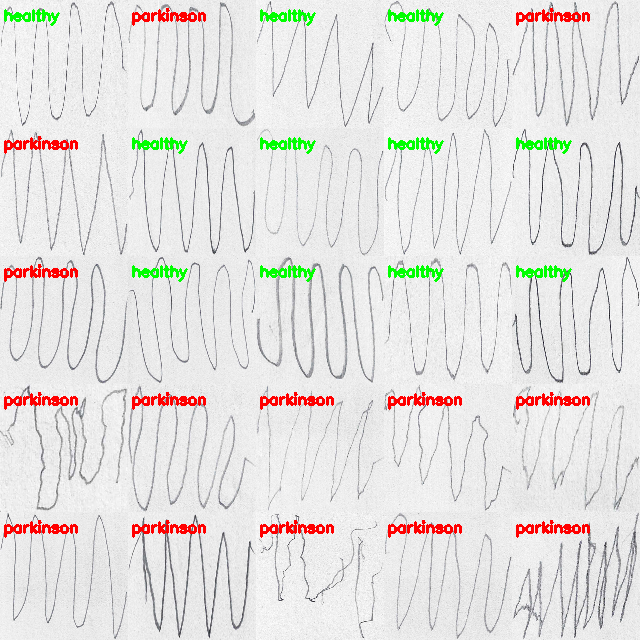

In [52]:
from imutils import build_montages

montage = build_montages(images, (128, 128), (5, 5))[0]

cv2_imshow(montage)

**Kesimpulan:** Nilai akurasi yang saya dapat berdasarkan komposisi feature extractor, ukuran gambar, algoritma, serta hyperparameter terbaik yang didapat dari nomor 1, saya mendapatkan hasil akurasi yang sama sama **77%** pada **Random Forest Classifier** dengan nilai **Estimator = 50** ukuran gambar = **128** dan menggunakan metode **HOG**, hal ini bisa terjadi dikarenakan mesin menganggap gambar yang saya tambahkan memiliki tingkat kemiripan yang hampir sama dengan gambar yang sudah ada, namun setelah saya coba dengan metode, estimator, dan algoritma yang berbeda maka akan ditemukan perubahan tingkat akurasi dengan perbandingan akurasi pada soal nomor 1, ini saya coba pada codingan yang saya comment pada nomor 2. namun dari gambar **montage** yang saya dapatkan, ketika testing menjadi lebih akurat, dikarenakan mesin melakukan training data dengan data yang lebih banyak daripada yang sebelumnya